In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv')

In [3]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [4]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [5]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


<AxesSubplot:>

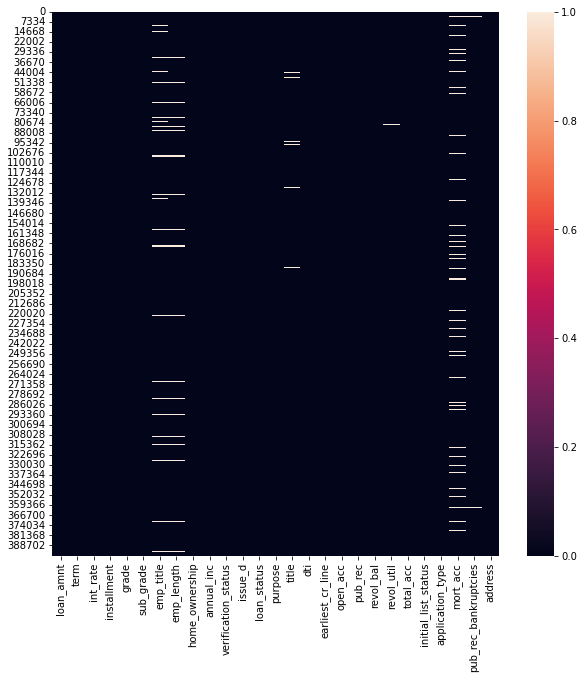

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

In [7]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

<AxesSubplot:>

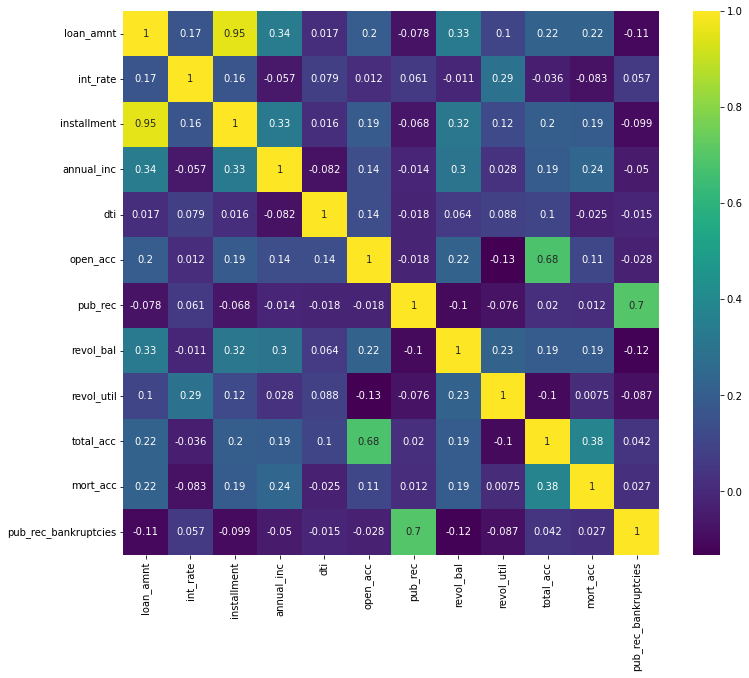

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

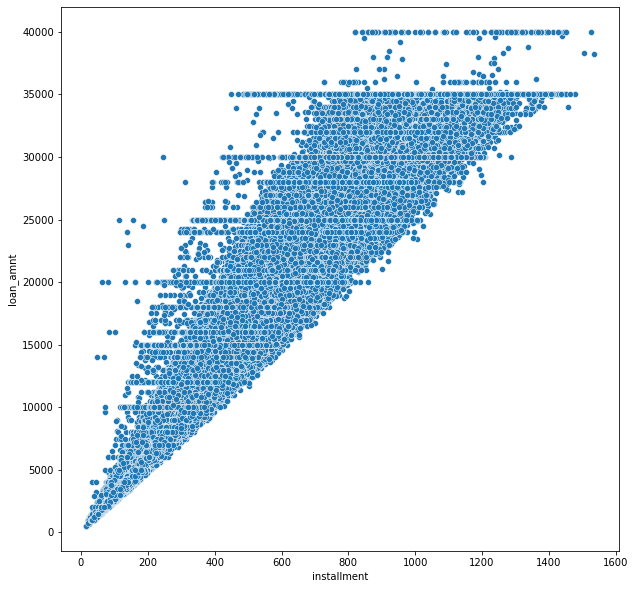

In [9]:
# Looks like Installment and Loan amount have clear correlation, positive correlation. Let's explaore that more
plt.figure(figsize=(10,10))
sns.scatterplot(x='installment', y='loan_amnt', data=df)

In [10]:
df['term'] = df['term'].apply(lambda term: 36 if term.strip().startswith('36') else 60)

In [11]:
df['term'].unique()

array([36, 60], dtype=int64)

In [12]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [13]:
df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [14]:
loan_dummy = pd.get_dummies(df['loan_status'], drop_first=True)

In [15]:
loan_dummy

,Fully Paid
0,1
1,1
2,1
3,1
4,0
...,...
396025,1
396026,1
396027,1
396028,1


In [16]:
df['loan_repaid'] = loan_dummy

In [17]:
df['loan_repaid']

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_repaid, Length: 396030, dtype: uint8

In [18]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [20]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [21]:
sorted_g = sorted(df['grade'].unique())

In [99]:
sorted_g

['A', 'B', 'C', 'D', 'E', 'F', 'G']

<AxesSubplot:xlabel='grade', ylabel='count'>

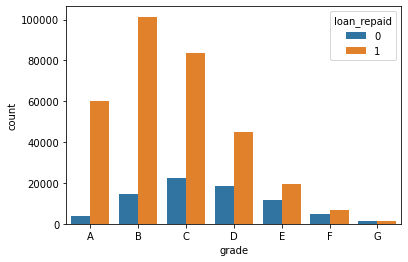

In [22]:
sns.countplot(x='grade', hue='loan_repaid', data=df, order=sorted(df['grade'].unique()))

In [23]:
sorted_o = sorted(df['sub_grade'].unique())

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

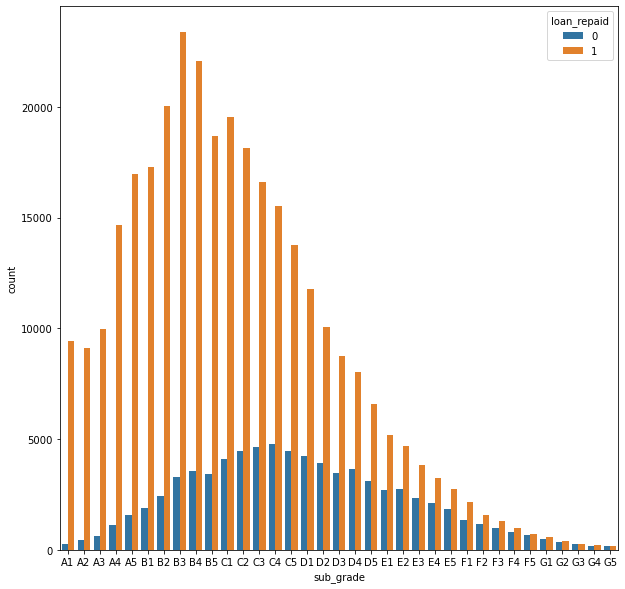

In [24]:
plt.figure(figsize=(10,10))
sns.countplot(x='sub_grade', hue='loan_repaid', order=sorted_o, data=df)

In [25]:
df.drop('grade', axis=1, inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   sub_grade             396030 non-null  object 
 5   emp_title             373103 non-null  object 
 6   emp_length            377729 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  title                 394275 non-null  object 
 14  dti                   396030 non-null  float64
 15  

In [27]:
df['emp_title'].unique()

array(['Marketing', 'Credit analyst ', 'Statistician', ...,
       "Michael's Arts & Crafts", 'licensed bankere',
       'Gracon Services, Inc'], dtype=object)

In [28]:
df['emp_title'].nunique()

173105

In [29]:
df.drop('emp_title', axis=1, inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   sub_grade             396030 non-null  object 
 5   emp_length            377729 non-null  object 
 6   home_ownership        396030 non-null  object 
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  object 
 9   issue_d               396030 non-null  object 
 10  loan_status           396030 non-null  object 
 11  purpose               396030 non-null  object 
 12  title                 394275 non-null  object 
 13  dti                   396030 non-null  float64
 14  earliest_cr_line      396030 non-null  object 
 15  

In [31]:
df['emp_length']

0         10+ years
1           4 years
2          < 1 year
3           6 years
4           9 years
            ...    
396025      2 years
396026      5 years
396027    10+ years
396028    10+ years
396029    10+ years
Name: emp_length, Length: 396030, dtype: object

In [32]:
df['emp_length'].nunique()

11

In [33]:
df['emp_length'].isnull().sum()

18301

In [34]:
uni_emp_len = df['emp_length'].unique()
uni_emp_len

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [35]:
df['emp_length'] = df['emp_length'].apply(lambda emp_lenght: 'Other' if emp_lenght not in uni_emp_len else emp_lenght)

In [36]:
sorted_len = sorted(df['emp_length'].unique())
sorted_len

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year',
 'Other']

In [37]:
type(sorted_len)

list

In [38]:
df['emp_length'].isnull().sum()

0

In [39]:
total_emp_10_years = df[(df['emp_length'] == '10+ years')]
repaid_10 = df[(df['emp_length'] == '10+ years') & df['loan_repaid'] == 1]

In [40]:
repaid_10

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36,11.44,329.48,B4,10+ years,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
5,20000.0,36,13.33,677.07,C3,10+ years,MORTGAGE,86788.0,Verified,Sep-2015,...,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\nNorth Deniseber...,1
7,13000.0,36,11.14,426.47,B2,10+ years,RENT,46000.0,Not Verified,Sep-2012,...,0.0,13425.0,64.5,15.0,f,INDIVIDUAL,0.0,0.0,USCGC Nunez\nFPO AE 30723,1
8,18900.0,60,10.99,410.84,B3,10+ years,RENT,103000.0,Verified,Oct-2014,...,0.0,18637.0,32.9,40.0,w,INDIVIDUAL,3.0,0.0,USCGC Tran\nFPO AP 22690,1
13,35000.0,60,12.29,783.70,C1,10+ years,MORTGAGE,157000.0,Verified,Apr-2015,...,0.0,113091.0,94.9,27.0,w,INDIVIDUAL,2.0,0.0,"3343 Wells Mews\nShellychester, OR 29597",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396021,3200.0,36,5.42,96.52,A1,10+ years,RENT,33000.0,Not Verified,Feb-2011,...,0.0,3985.0,7.6,50.0,f,INDIVIDUAL,NaN,0.0,"309 John Mission\nWest Marc, NY 00813",1
396023,22000.0,36,18.92,805.55,D4,10+ years,MORTGAGE,138000.0,Not Verified,Apr-2014,...,0.0,22287.0,50.4,39.0,f,INDIVIDUAL,4.0,0.0,"0297 Flores Dale Suite 441\nTaylorland, MD 05113",1
396027,5000.0,36,9.99,161.32,B1,10+ years,RENT,56500.0,Verified,Oct-2013,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",1
396028,21000.0,60,15.31,503.02,C2,10+ years,MORTGAGE,64000.0,Verified,Aug-2012,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1


In [41]:
repaid_10.value_counts().sum()

94955

In [42]:
def get_loan_repaid_percentage(emp_len):
    total_emp_in_cat = df[df['emp_length'] == emp_len]
    repaid = df[(df['emp_length'] == emp_len) & df['loan_repaid'] == 1]
    return total_emp_in_cat.value_counts().sum(), repaid.value_counts().sum()

In [43]:
percentage_data = []
for elen in sorted_len:
    total, repaid = get_loan_repaid_percentage(elen)
    percentage_data.append((total-repaid)/total)
percentage_data

[0.2074116506565612,
 0.18645795849826077,
 0.20122878135292627,
 0.2027977070339258,
 0.20008752309637265,
 0.19978489997849,
 0.1952414275717285,
 0.1979139229837223,
 0.2035077793493635,
 0.20615318723677636,
 0.21530002912904164,
 0.2796311523552214]

[0.2074116506565612,
 0.18645795849826077,
 0.20122878135292627,
 0.2027977070339258,
 0.20008752309637265,
 0.19978489997849,
 0.1952414275717285,
 0.1979139229837223,
 0.2035077793493635,
 0.20615318723677636,
 0.21530002912904164,
 0.2796311523552214]

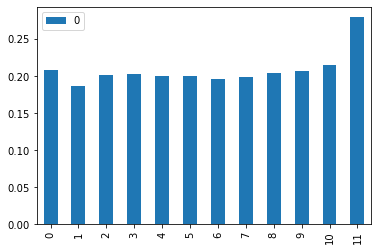

In [44]:
pd.DataFrame(percentage_data).plot(kind='bar')
percentage_data

In [45]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [46]:
emp_co

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Other         5038
Name: loan_status, dtype: int64

In [47]:
emp_fp

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Other         13263
Name: loan_status, dtype: int64

In [48]:
perc = emp_co / emp_fp

<AxesSubplot:xlabel='emp_length'>

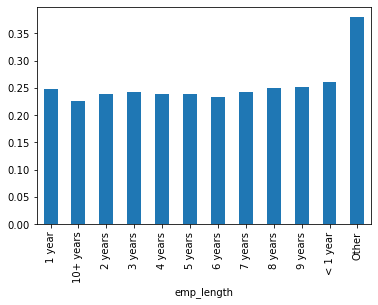

In [49]:
perc.plot(kind='bar')

In [50]:
df.drop('emp_length', axis=1, inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   sub_grade             396030 non-null  object 
 5   home_ownership        396030 non-null  object 
 6   annual_inc            396030 non-null  float64
 7   verification_status   396030 non-null  object 
 8   issue_d               396030 non-null  object 
 9   loan_status           396030 non-null  object 
 10  purpose               396030 non-null  object 
 11  title                 394275 non-null  object 
 12  dti                   396030 non-null  float64
 13  earliest_cr_line      396030 non-null  object 
 14  open_acc              396030 non-null  float64
 15  

In [52]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype=object)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

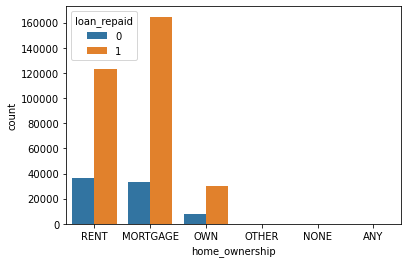

In [53]:
sns.countplot(x='home_ownership', hue='loan_repaid', data=df)

In [54]:
df[df['loan_status'] == 'Fully Paid'].groupby('home_ownership').count()['loan_status']

home_ownership
ANY              3
MORTGAGE    164716
NONE            24
OTHER           96
OWN          29940
RENT        123578
Name: loan_status, dtype: int64

In [55]:
df['home_ownership'].isnull().sum()

0

In [56]:
df['home_ownership'] = df['home_ownership'].apply(lambda home_ownership: 'OTHER' if home_ownership in ['NONE', 'ANY'] else home_ownership)

In [57]:
df[df['loan_repaid'] == 1].groupby('home_ownership').count()['loan_repaid']

home_ownership
MORTGAGE    164716
OTHER          123
OWN          29940
RENT        123578
Name: loan_repaid, dtype: int64

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

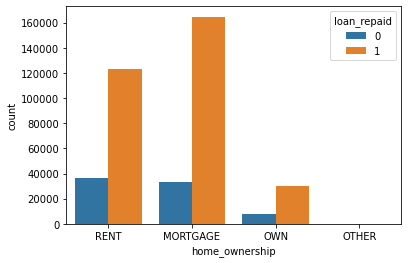

In [58]:
sns.countplot(x='home_ownership', hue='loan_repaid', data=df)

In [59]:
df[df['loan_repaid'] == 1].groupby('home_ownership').count()['loan_repaid']

home_ownership
MORTGAGE    164716
OTHER          123
OWN          29940
RENT        123578
Name: loan_repaid, dtype: int64

In [60]:
df.drop('loan_status', axis=1, inplace=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   sub_grade             396030 non-null  object 
 5   home_ownership        396030 non-null  object 
 6   annual_inc            396030 non-null  float64
 7   verification_status   396030 non-null  object 
 8   issue_d               396030 non-null  object 
 9   purpose               396030 non-null  object 
 10  title                 394275 non-null  object 
 11  dti                   396030 non-null  float64
 12  earliest_cr_line      396030 non-null  object 
 13  open_acc              396030 non-null  float64
 14  pub_rec               396030 non-null  float64
 15  

In [62]:
df.drop('issue_d', inplace=True, axis=1)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   sub_grade             396030 non-null  object 
 5   home_ownership        396030 non-null  object 
 6   annual_inc            396030 non-null  float64
 7   verification_status   396030 non-null  object 
 8   purpose               396030 non-null  object 
 9   title                 394275 non-null  object 
 10  dti                   396030 non-null  float64
 11  earliest_cr_line      396030 non-null  object 
 12  open_acc              396030 non-null  float64
 13  pub_rec               396030 non-null  float64
 14  revol_bal             396030 non-null  float64
 15  

In [64]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [65]:
df['purpose'].count()

396030

In [66]:
df['purpose'].isnull().sum()

0

<AxesSubplot:xlabel='purpose', ylabel='count'>

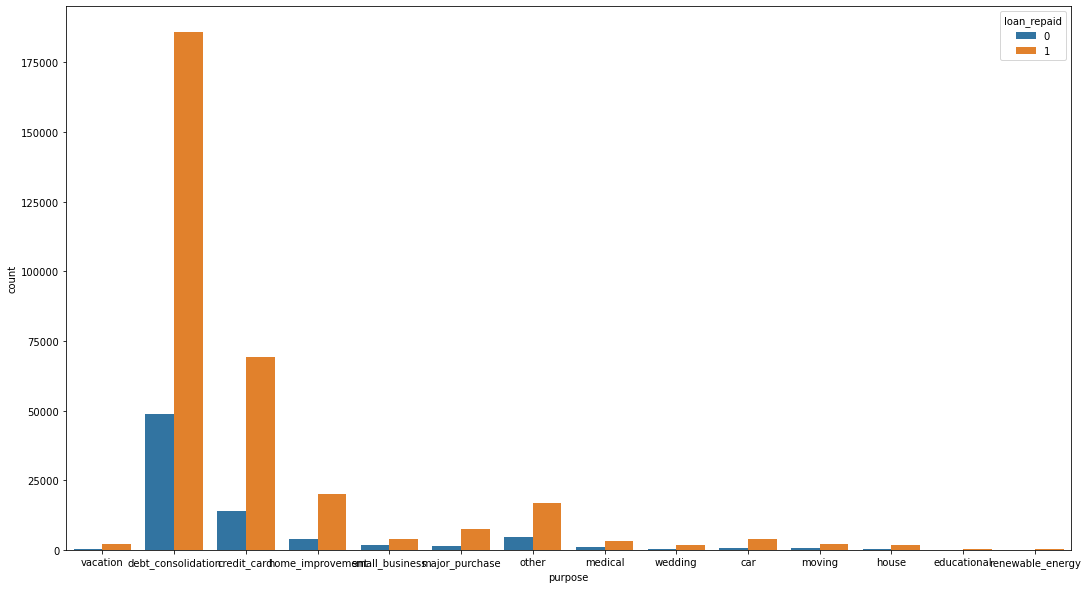

In [67]:
plt.figure(figsize=(18,10))
sns.countplot(x='purpose', hue='loan_repaid', data=df)

In [102]:
count_repaid = df[df['loan_repaid'] == 1].groupby('purpose').count()['loan_repaid']

In [103]:
count_not_repaid = df[df['loan_repaid'] == 0].groupby('purpose').count()['loan_repaid']

<AxesSubplot:xlabel='purpose'>

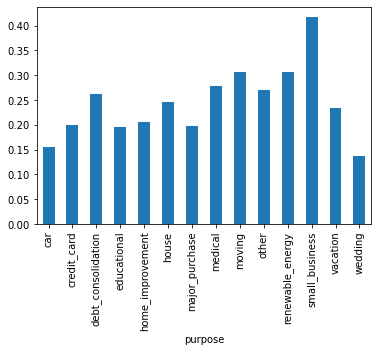

In [104]:
(count_not_repaid / count_repaid).plot(kind='bar')

In [106]:
df['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

<AxesSubplot:xlabel='application_type', ylabel='count'>

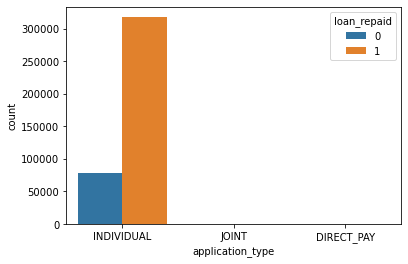

In [107]:
sns.countplot(x='application_type', hue='loan_repaid', data=df)

<AxesSubplot:xlabel='application_type'>

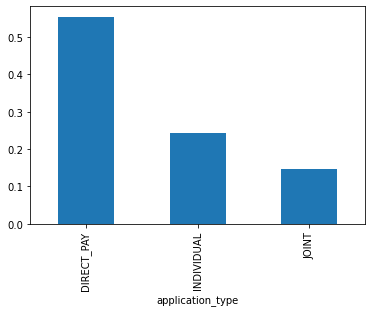

In [108]:
perc_paid = df[df['loan_repaid'] == 1].groupby('application_type').count()['loan_repaid']
perc_not_paid = df[df['loan_repaid'] == 0].groupby('application_type').count()['loan_repaid']
(perc_not_paid / perc_paid).plot(kind='bar')

In [113]:
df[df['application_type'] == 'DIRECT_PAY'].count()

loan_amnt               286
term                    286
int_rate                286
installment             286
sub_grade               286
home_ownership          286
annual_inc              286
verification_status     286
purpose                 286
dti                     286
open_acc                286
pub_rec                 286
revol_bal               286
revol_util              286
total_acc               286
application_type        286
mort_acc                286
pub_rec_bankruptcies    286
address                 286
loan_repaid             286
year                    286
w                       286
dtype: int64

In [114]:
df[df['application_type'] == 'JOINT'].count()

loan_amnt               425
term                    425
int_rate                425
installment             425
sub_grade               425
home_ownership          425
annual_inc              425
verification_status     425
purpose                 425
dti                     425
open_acc                425
pub_rec                 425
revol_bal               425
revol_util              425
total_acc               425
application_type        425
mort_acc                425
pub_rec_bankruptcies    425
address                 425
loan_repaid             425
year                    425
w                       425
dtype: int64

In [115]:
286 / 396030 

0.0007221675125621797

In [116]:
425 / 396030

0.0010731510239123299

In [122]:
index_i = df[(df['application_type'] == 'JOINT') | (df['application_type'] == 'DIRECT_PAY')].index
index_i

Int64Index([    12,    885,   1291,   2047,   3169,   3544,   4132,   4413,
              6273,   6527,
            ...
            393301, 393430, 393545, 393787, 394511, 394755, 395280, 395306,
            395355, 395810],
           dtype='int64', length=711)

In [123]:
df.drop(index_i, inplace=True)

In [125]:
df.drop('application_type', axis=1, inplace=True)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395319 entries, 0 to 396029
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395319 non-null  float64
 1   term                  395319 non-null  int64  
 2   int_rate              395319 non-null  float64
 3   installment           395319 non-null  float64
 4   sub_grade             395319 non-null  object 
 5   home_ownership        395319 non-null  object 
 6   annual_inc            395319 non-null  float64
 7   verification_status   395319 non-null  object 
 8   purpose               395319 non-null  object 
 9   dti                   395319 non-null  float64
 10  open_acc              395319 non-null  float64
 11  pub_rec               395319 non-null  float64
 12  revol_bal             395319 non-null  float64
 13  revol_util            395043 non-null  float64
 14  total_acc             395319 non-null  float64
 15  

In [127]:
df['address'] = df['address'].apply(lambda address: address.strip()[-5:]).astype(float)

In [129]:
df['address'] = df['address'].astype(int)

In [130]:
df['address']

0         22690
1          5113
2          5113
3           813
4         11650
          ...  
396025    30723
396026     5113
396027    70466
396028    29597
396029    48052
Name: address, Length: 395319, dtype: int32

In [132]:
df['address'].unique()

array([22690,  5113,   813, 11650, 30723, 29597, 70466, 48052, 86630,
       93700])

<AxesSubplot:xlabel='address', ylabel='count'>

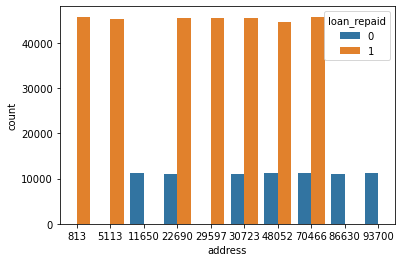

In [133]:
sns.countplot(x='address', hue='loan_repaid', data=df)

In [139]:
def process_zip_codes(zip_code):
    zip_map = {22690: 'zip_mid',
               5113:  'zip_pay',
               813:   'zip_pay',
               11650: 'zip_not_pay',
               30723: 'zip_mid',  
               29597: 'zip_pay',
               70466: 'zip_mid',
               48052: 'zip_mid',
               86630: 'zip_not_pay',
               93700: 'zip_not_pay'}
    return zip_map[int(zip_code)]

df['address'] = df['address'].apply(lambda address: process_zip_codes(address))

AttributeError: 'str' object has no attribute 'astype'

In [141]:
dummies = pd.get_dummies(df['address'])
dummies

,zip_mid,zip_not_pay,zip_pay
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
396025,1,0,0
396026,0,0,1
396027,1,0,0
396028,0,0,1


In [142]:
df = pd.concat((df, dummies), axis=1)

In [143]:
df.drop('address', axis=1, inplace=True)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395319 entries, 0 to 396029
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395319 non-null  float64
 1   term                  395319 non-null  int64  
 2   int_rate              395319 non-null  float64
 3   installment           395319 non-null  float64
 4   sub_grade             395319 non-null  object 
 5   home_ownership        395319 non-null  object 
 6   annual_inc            395319 non-null  float64
 7   verification_status   395319 non-null  object 
 8   purpose               395319 non-null  object 
 9   dti                   395319 non-null  float64
 10  open_acc              395319 non-null  float64
 11  pub_rec               395319 non-null  float64
 12  revol_bal             395319 non-null  float64
 13  revol_util            395043 non-null  float64
 14  total_acc             395319 non-null  float64
 15  

In [145]:
dummies = pd.get_dummies(df['verification_status'])
df = pd.concat((df, dummies))

In [146]:
df.drop('verification_status', axis=1, inplace=True)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790638 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395319 non-null  float64
 1   term                  395319 non-null  float64
 2   int_rate              395319 non-null  float64
 3   installment           395319 non-null  float64
 4   sub_grade             395319 non-null  object 
 5   home_ownership        395319 non-null  object 
 6   annual_inc            395319 non-null  float64
 7   purpose               395319 non-null  object 
 8   dti                   395319 non-null  float64
 9   open_acc              395319 non-null  float64
 10  pub_rec               395319 non-null  float64
 11  revol_bal             395319 non-null  float64
 12  revol_util            395043 non-null  float64
 13  total_acc             395319 non-null  float64
 14  mort_acc              357524 non-null  float64
 15  

In [148]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', nan], dtype=object)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

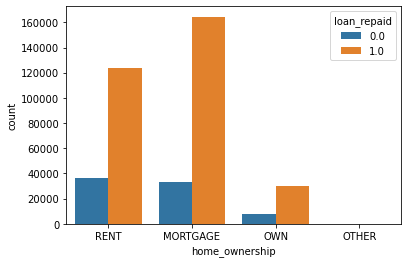

In [150]:
sns.countplot(x='home_ownership', hue='loan_repaid', data=df)

In [151]:
dummies = pd.get_dummies(df[['home_ownership', 'sub_grade']])
df = pd.concat((df, dummies))
df.drop(['home_ownership', 'sub_grade'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1581276 entries, 0 to 396029
Data columns (total 62 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                395319 non-null  float64
 1   term                     395319 non-null  float64
 2   int_rate                 395319 non-null  float64
 3   installment              395319 non-null  float64
 4   annual_inc               395319 non-null  float64
 5   purpose                  395319 non-null  object 
 6   dti                      395319 non-null  float64
 7   open_acc                 395319 non-null  float64
 8   pub_rec                  395319 non-null  float64
 9   revol_bal                395319 non-null  float64
 10  revol_util               395043 non-null  float64
 11  total_acc                395319 non-null  float64
 12  mort_acc                 357524 non-null  float64
 13  pub_rec_bankruptcies     394784 non-null  float64
 14  loa

In [152]:
df['purpose'].nunique()

14

<AxesSubplot:xlabel='purpose'>

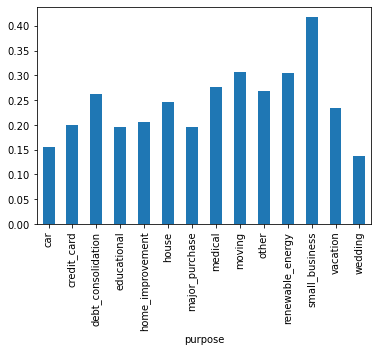

In [153]:
perc_paid = df[df['loan_repaid'] == 1].groupby('purpose').count()['loan_repaid']
perc_not_paid = df[df['loan_repaid'] == 0].groupby('purpose').count()['loan_repaid']
(perc_not_paid / perc_paid).plot(kind='bar')

In [154]:
dummies = pd.get_dummies(df['purpose'])
df = pd.concat((df, dummies))
df.drop('purpose', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3162552 entries, 0 to 396029
Data columns (total 75 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   loan_amnt                float64
 1   term                     float64
 2   int_rate                 float64
 3   installment              float64
 4   annual_inc               float64
 5   dti                      float64
 6   open_acc                 float64
 7   pub_rec                  float64
 8   revol_bal                float64
 9   revol_util               float64
 10  total_acc                float64
 11  mort_acc                 float64
 12  pub_rec_bankruptcies     float64
 13  loan_repaid              float64
 14  year                     float64
 15  w                        float64
 16  zip_mid                  float64
 17  zip_not_pay              float64
 18  zip_pay                  float64
 19  Not Verified             float64
 20  Source Verified          float64
 21  Verified 

<AxesSubplot:xlabel='address'>

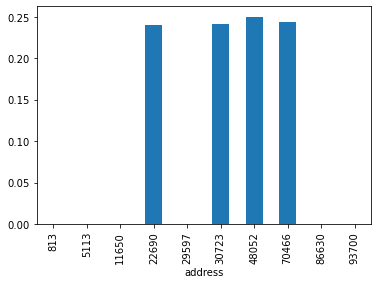

In [131]:
perc_p = df[df['loan_repaid'] == 1].groupby('address').count()['loan_repaid']
perc_np = df[df['loan_repaid'] == 0].groupby('address').count()['loan_repaid']

(perc_np / perc_p).plot(kind='bar')

In [69]:
df.drop('title', axis=1, inplace=True)

In [68]:
df['title'].nunique()

48817

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   sub_grade             396030 non-null  object 
 5   home_ownership        396030 non-null  object 
 6   annual_inc            396030 non-null  float64
 7   verification_status   396030 non-null  object 
 8   purpose               396030 non-null  object 
 9   dti                   396030 non-null  float64
 10  open_acc              396030 non-null  float64
 11  pub_rec               396030 non-null  float64
 12  revol_bal             396030 non-null  float64
 13  revol_util            395754 non-null  float64
 14  total_acc             396030 non-null  float64
 15  

In [71]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 396030, dtype: object

In [72]:
df['earliest_cr_line'].nunique()

684

In [73]:
_dt = pd.to_datetime(df['earliest_cr_line'])
_dt

0        1990-06-01
1        2004-07-01
2        2007-08-01
3        2006-09-01
4        1999-03-01
            ...    
396025   2004-11-01
396026   2006-02-01
396027   1997-03-01
396028   1990-11-01
396029   1998-09-01
Name: earliest_cr_line, Length: 396030, dtype: datetime64[ns]

In [74]:
df['year'] = _dt.dt.year

In [75]:
_dt.dt.year

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 396030, dtype: int64

<AxesSubplot:xlabel='year', ylabel='count'>

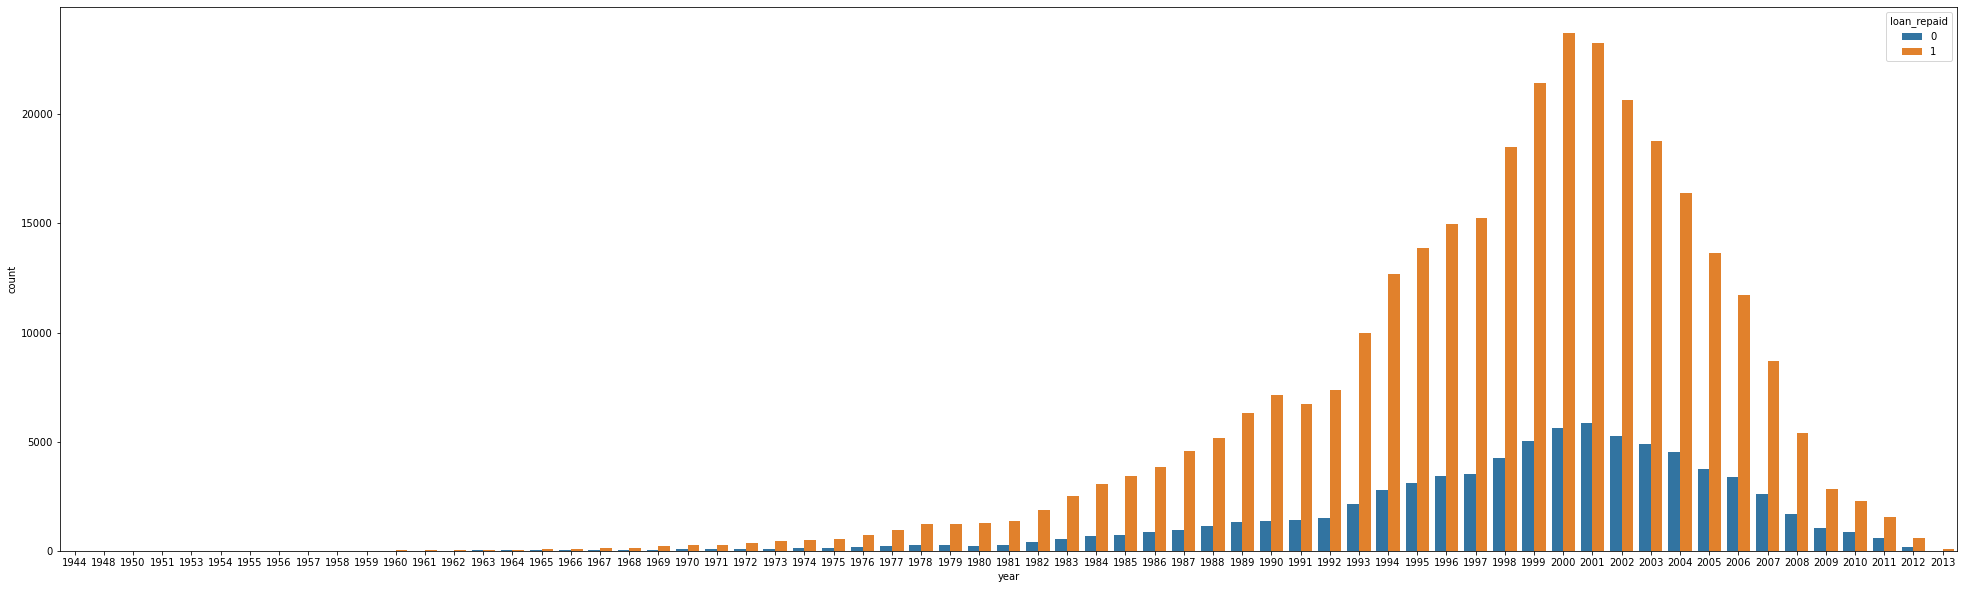

In [76]:
plt.figure(figsize=(34,10))
sns.countplot(x='year', hue='loan_repaid', data=df)

<AxesSubplot:xlabel='year', ylabel='loan_repaid'>

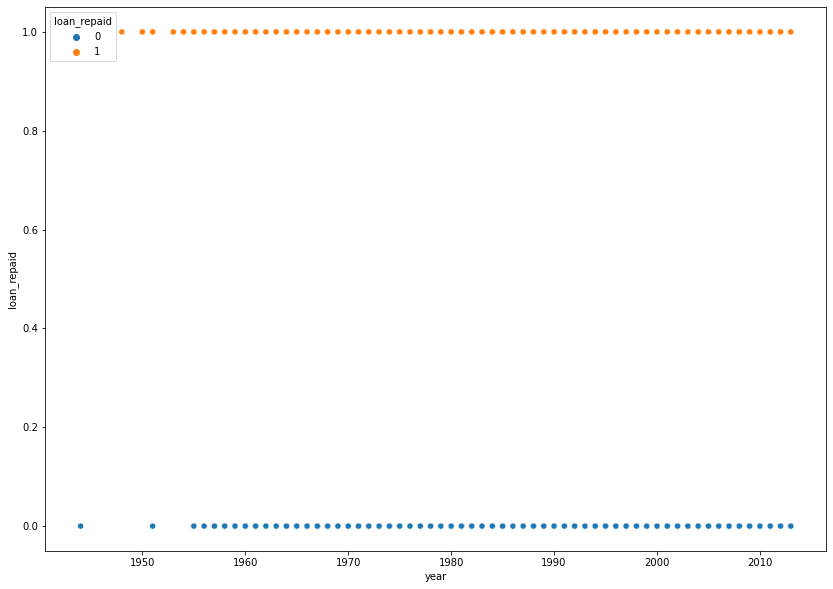

In [77]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='year', y='loan_repaid', hue='loan_repaid', data=df)

In [78]:
df.drop('earliest_cr_line', axis=1, inplace=True)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   sub_grade             396030 non-null  object 
 5   home_ownership        396030 non-null  object 
 6   annual_inc            396030 non-null  float64
 7   verification_status   396030 non-null  object 
 8   purpose               396030 non-null  object 
 9   dti                   396030 non-null  float64
 10  open_acc              396030 non-null  float64
 11  pub_rec               396030 non-null  float64
 12  revol_bal             396030 non-null  float64
 13  revol_util            395754 non-null  float64
 14  total_acc             396030 non-null  float64
 15  

In [80]:
df['initial_list_status']

0         w
1         f
2         f
3         f
4         f
         ..
396025    w
396026    f
396027    f
396028    f
396029    f
Name: initial_list_status, Length: 396030, dtype: object

<AxesSubplot:xlabel='initial_list_status', ylabel='count'>

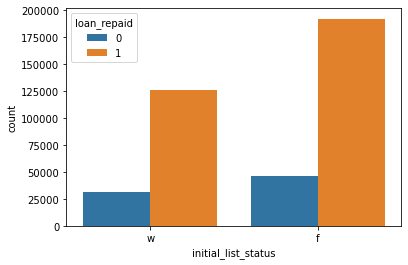

In [81]:
sns.countplot(x='initial_list_status', hue='loan_repaid' , data=df)

In [82]:
iis = pd.get_dummies(df['initial_list_status'], drop_first=True)

In [83]:
df = pd.concat((df, iis), axis=1)

In [84]:
df

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,purpose,dti,...,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid,year,w
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,vacation,26.24,...,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1,1990,1
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,debt_consolidation,22.05,...,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1,2004,0
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,credit_card,12.79,...,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1,2007,0
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,credit_card,2.60,...,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1,2006,0
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,credit_card,33.95,...,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0,1999,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B4,RENT,40000.0,Source Verified,debt_consolidation,15.63,...,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",1,2004,1
396026,21000.0,36,12.29,700.42,C1,MORTGAGE,110000.0,Source Verified,debt_consolidation,21.45,...,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",1,2006,0
396027,5000.0,36,9.99,161.32,B1,RENT,56500.0,Verified,debt_consolidation,17.56,...,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",1,1997,0
396028,21000.0,60,15.31,503.02,C2,MORTGAGE,64000.0,Verified,debt_consolidation,15.88,...,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1,1990,0


In [85]:
df.drop('initial_list_status', axis=1, inplace=True)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   sub_grade             396030 non-null  object 
 5   home_ownership        396030 non-null  object 
 6   annual_inc            396030 non-null  float64
 7   verification_status   396030 non-null  object 
 8   purpose               396030 non-null  object 
 9   dti                   396030 non-null  float64
 10  open_acc              396030 non-null  float64
 11  pub_rec               396030 non-null  float64
 12  revol_bal             396030 non-null  float64
 13  revol_util            395754 non-null  float64
 14  total_acc             396030 non-null  float64
 15  

In [87]:
df['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [88]:
df['application_type'].nunique()

3

<AxesSubplot:xlabel='application_type', ylabel='count'>

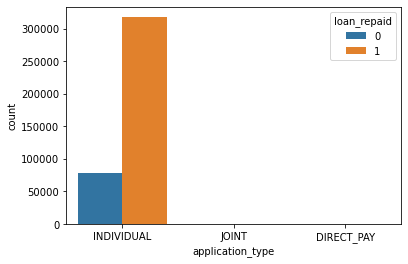

In [89]:
sns.countplot(x='application_type', hue='loan_repaid', data=df)

In [90]:
df['application_type'].value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [91]:
df[df['application_type'] == 'JOINT']

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,purpose,dti,...,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid,year,w
12,7500.0,36,9.17,239.10,B2,OWN,55000.0,Not Verified,debt_consolidation,28.21,...,17838.0,54.9,35.0,JOINT,4.0,0.0,"4173 David Extension\nWest Beckyfort, MS 70466",1,1995,1
1291,10000.0,36,11.47,329.62,B5,MORTGAGE,22000.0,Verified,debt_consolidation,40.81,...,5906.0,53.7,33.0,JOINT,2.0,0.0,USNV Gray\nFPO AP 48052,1,2002,1
2047,35000.0,36,8.99,1112.83,B1,MORTGAGE,150000.0,Source Verified,credit_card,15.16,...,19713.0,22.2,44.0,JOINT,5.0,0.0,"5992 Kimberly Common\nLake Deborah, ME 05113",1,1995,1
4413,24000.0,36,14.46,825.64,C4,RENT,27000.0,Verified,credit_card,51.20,...,17382.0,83.6,62.0,JOINT,2.0,0.0,USCGC Olson\nFPO AA 30723,1,2000,1
6273,16000.0,36,14.46,550.43,C4,OWN,25608.0,Verified,credit_card,58.90,...,17957.0,64.6,30.0,JOINT,0.0,0.0,"7185 Davis Ramp Suite 729\nMichaelmouth, KS 48052",0,2005,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393787,21825.0,60,11.99,485.38,C1,RENT,180000.0,Verified,other,15.71,...,30517.0,60.7,30.0,JOINT,0.0,1.0,"48049 Nathan Path\nLake Christopher, DC 86630",0,1991,1
395280,13000.0,36,12.29,433.59,C1,MORTGAGE,63440.0,Verified,debt_consolidation,24.06,...,15476.0,76.6,16.0,JOINT,1.0,0.0,"9039 Lopez Crossroad Suite 172\nNealville, SC ...",1,2004,1
395306,35000.0,60,16.59,862.15,D2,MORTGAGE,125000.0,Source Verified,credit_card,30.07,...,44153.0,67.1,48.0,JOINT,5.0,0.0,"6013 Courtney Loop\nPort Latoya, TX 30723",1,2001,1
395355,5400.0,36,12.99,181.93,C2,MORTGAGE,48000.0,Verified,debt_consolidation,37.65,...,9951.0,31.3,38.0,JOINT,2.0,0.0,3135 Christine Path Suite 247\nEast Benjaminvi...,1,2000,1


In [92]:
df[df['loan_repaid'] == 1].groupby('home_ownership').count()['loan_repaid']

home_ownership
MORTGAGE    164716
OTHER          123
OWN          29940
RENT        123578
Name: loan_repaid, dtype: int64

In [93]:
df['application_type'].nunique()

3

In [94]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
purpose                     0
dti                         0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
year                        0
w                           0
dtype: int64

In [95]:
df['revol_util'].nunique()

1226

<AxesSubplot:xlabel='revol_util', ylabel='count'>

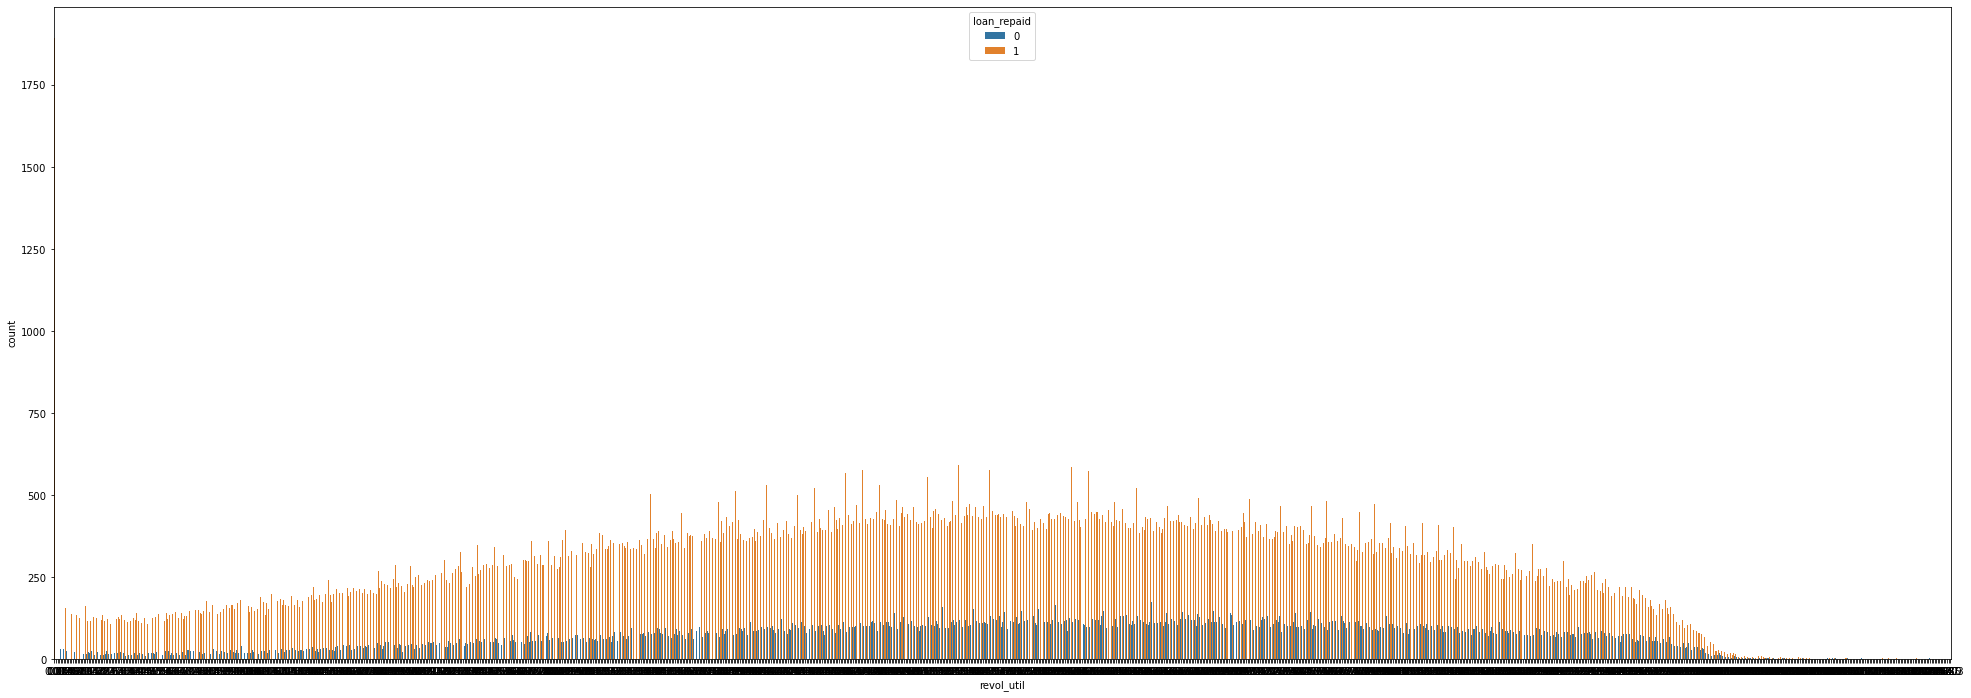

In [96]:
plt.figure(figsize=(34,12))
sns.countplot(x='revol_util', hue='loan_repaid', data=df)

<AxesSubplot:xlabel='revol_util', ylabel='loan_amnt'>

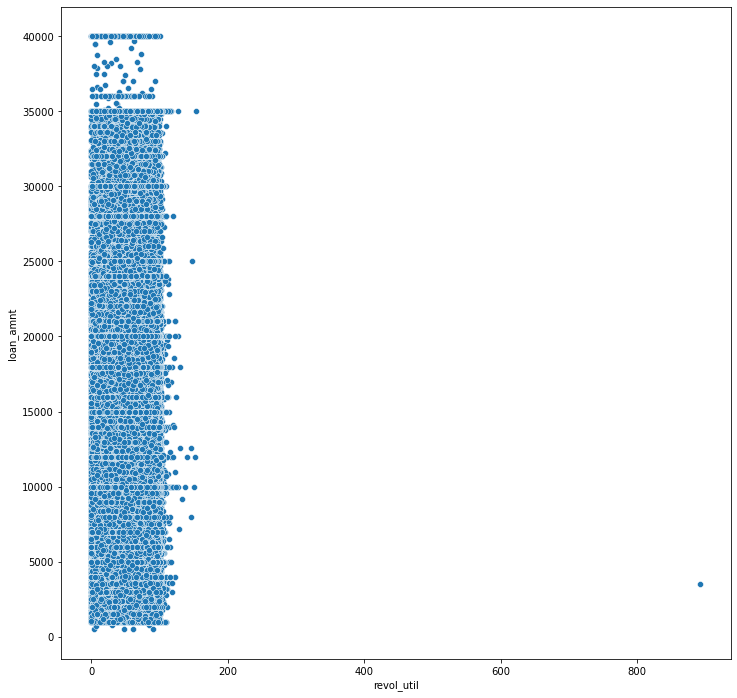

In [97]:
plt.figure(figsize=(12,12))
sns.scatterplot(x='revol_util', y='loan_amnt', data=df)

KeyboardInterrupt: 

<Figure size 864x864 with 0 Axes>

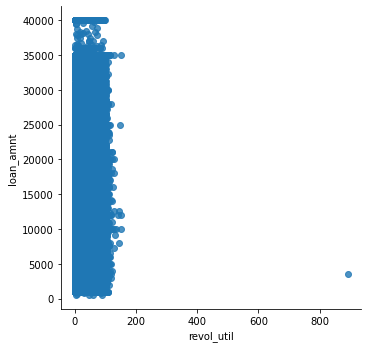

In [98]:
plt.figure(figsize=(12,12))
sns.lmplot(x='revol_util', y='loan_amnt', data=df)

In [ ]:
plt.figure(figsize=(12,12))
sns.boxplot(x='revol_util', y='loan_amnt', data=df)

In [ ]:
df['revol_util'].isnull().sum()

In [ ]:
indexes = df[df['revol_util'].isnull()]

In [ ]:
indexes

In [ ]:
df.drop(indexes.index, inplace=True)

In [ ]:
df.info()

In [ ]:
df['application_type'].nunique()

In [ ]:
app_dummy = pd.get_dummies(df['application_type'])
app_dummy

In [ ]:
df['application_type'].isnull().sum()

In [ ]:
df = pd.concat((df, app_dummy), axis=1)

In [ ]:
df

In [ ]:
df.drop('application_type', axis=1, inplace=True)

In [ ]:
df.info()

In [ ]:
df = df.dropna()

In [ ]:
df.info()

In [ ]:
df.select_dtypes('object')

In [ ]:
df['zipcode'] = df['address'].apply(lambda address: address[-5:])

In [ ]:
df['address'].isnull().sum()

In [ ]:
df.drop('zipcode', axis=1, inplace=True)

In [ ]:
df

In [ ]:
df['purpose'].nunique()

In [ ]:
df['purpose'].unique()

In [ ]:
plt.figure(figsize=(24,10))
sns.countplot(x='purpose', hue='loan_repaid', data=df)

In [ ]:
dummy_purpose = pd.get_dummies(df['purpose'])

In [ ]:
df = pd.concat((df, dummy_purpose), axis=1)

In [ ]:
df

In [ ]:
df.info()

In [ ]:
dummies = pd.get_dummies(df[['sub_grade', 'home_ownership', 'verification_status']])

In [ ]:
dummies

In [ ]:
df['address'] = df['address'].apply(lambda address: address.strip()[-5:])

In [ ]:
df['address'] = df['address'].astype(float)

In [ ]:
df.select_dtypes('object')

In [ ]:
df = pd.concat((df, dummies), axis=1)

In [ ]:
df.columns

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='verification_status', hue='loan_repaid', data=df)

In [ ]:
perc_not_paid = df[df['loan_repaid'] == 0].groupby('verification_status').count()['loan_repaid']

In [ ]:
perc_not_paid

In [ ]:
perc_paid = df[df['loan_repaid'] == 1].groupby('verification_status').count()['loan_repaid']
perc_paid

In [ ]:
perc_total = (perc_not_paid / perc_paid).plot(kind='bar')

In [ ]:
# home_ownership
# ANY              3
# MORTGAGE    164716
# NONE            24
# OTHER           96
# OWN          29940
# RENT        123578
# Name: loan_repaid, dtype: int64

In [ ]:
df

In [ ]:
# indexs = df[df['home_ownership'] in ['ANY', 'OTHER', 'NONE']].index
indexs = df[df['home_ownership'].isin(['ANY', 'OTHER', 'NONE']) == True].index

In [ ]:
indexs

In [ ]:
df.drop(indexs, axis=0, inplace=True)

In [ ]:
df

In [ ]:
df.info()

In [ ]:
dummies = pd.get_dummies(df[['sub_grade', 'home_ownership', 'verification_status', 'purpose']])

In [ ]:
df = pd.concat((df, dummies), axis=1)

In [ ]:
df.columns

In [ ]:
df.drop(['purpose', 'sub_grade', 'home_ownership', 'verification_status'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

In [155]:
X = df.drop('loan_repaid', axis=1)
y = df['loan_repaid']

In [156]:
X

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,10000.0,36.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8000.0,36.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15600.0,36.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7200.0,36.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24375.0,60.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
X.isnull().sum()

loan_amnt           2767233
term                2767233
int_rate            2767233
installment         2767233
annual_inc          2767233
                     ...   
other               1581276
renewable_energy    1581276
small_business      1581276
vacation            1581276
wedding             1581276
Length: 74, dtype: int64

In [158]:
!pip install -q hvplot

In [159]:
import hvplot

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
scalar.fit(X_train)

In [ ]:
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

In [ ]:
X_train

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import Dropout

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()

In [ ]:
len(df.columns)

In [ ]:
model.add(Dense(88, activation='relu'))
model.add(Dense(44, activation='relu'))
model.add(Dense(22, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
model.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_test, y_test), verbose=1)

In [ ]:
loss = pd.DataFrame(model.history.history)
loss

In [ ]:
loss.plot()

In [ ]:
# Now doing the same with Call backs and Dropouts

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25)

In [ ]:
model1 = Sequential()
model1.add(Dense(88, activation='relu'))
model1.add(Dense(44, activation='relu'))
model1.add(Dense(22, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy')

model1.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

In [ ]:
pd.DataFrame(model1.history.history).plot()

In [ ]:
model2 = Sequential()
model2.add(Dense(88, activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(44, activation='relu'))
model2.add(Dropout(0.3))

model2.add(Dense(22, activation='relu'))
model2.add(Dropout(0.3))

model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy')

model2.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

In [ ]:
pd.DataFrame(model2.history.history).plot()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# predictions = model.predict_classes(X_test)

In [ ]:
y_pred1 = (model.predict(X_test) > 0.5).astype("int32")

In [ ]:
y_pred2 = (model1.predict(X_test) > 0.5).astype("int32")

In [ ]:
y_pred3 = (model2.predict(X_test) > 0.5).astype("int32")

In [ ]:
y_pred1

In [ ]:
print(classification_report(y_test, y_pred1))

In [ ]:
print(classification_report(y_test, y_pred2))

In [ ]:
print(classification_report(y_test, y_pred3))